Chapter 11

# 特征值分解
《线性代数》 | 鸢尾花书：数学不难

这段代码从头到尾，围绕**矩阵的特征值分解（Eigendecomposition）**展开，辅以几何可视化手段，展示了矩阵 $A$ 如何将单位圆变换为一个椭圆，并指出该椭圆的主轴方向即为 $A$ 的特征向量，主轴的长度则由特征值决定。

---

首先，定义了一个对称实矩阵：

$$
A = \begin{bmatrix} 1.25 & -0.75 \\ -0.75 & 1.25 \end{bmatrix}
$$

这是一个 $2\times 2$ 的对称矩阵，其特征值必为实数，特征向量可以正交化。

接着使用 `np.linalg.eig(A)` 对矩阵 $A$ 进行特征值分解，得到两个部分：

- $V$：由两个特征向量 $v_1, v_2$ 组成的矩阵，满足 $A v_i = \lambda_i v_i$。
- $\Lambda$：一个对角矩阵，包含对应的特征值 $\lambda_1, \lambda_2$：

$$
\Lambda = \operatorname{diag}(\lambda_1, \lambda_2), \quad
A = V \Lambda V^{-1}
$$

然后，分别提取了第一组和第二组特征值与特征向量，并验证了：

$$
A v_1 = \lambda_1 v_1, \quad A v_2 = \lambda_2 v_2
$$

这验证了特征值分解的定义。

---

下面是几何可视化部分。

首先，构造单位圆上 721 个点：

$$
(x_1, x_2) = (\cos\theta, \sin\theta), \quad \theta \in [0, 2\pi]
$$

这些点组成单位圆：

$$
\text{unit\_circle} = \left[ \begin{array}{c}
\cos\theta_1 \ \sin\theta_1 \\
\cos\theta_2 \ \sin\theta_2 \\
\vdots \\
\cos\theta_n \ \sin\theta_n \\
\end{array} \right]
$$

接着对单位圆中的每个点应用线性变换 $A$，即对每个点 $x$ 计算 $Ax$，几何上是将单位圆通过 $A$ 线性变换为一个椭圆。变换形式为右乘 $A^\top$：

$$
A_{\text{unit circle}} = \text{unit\_circle} \cdot A^\top
$$

注意是 $A^\top$，因为 NumPy 中是按行操作的。

---

然后绘制两个主要内容：

1. 原始单位圆（虚线）
2. 被 $A$ 变换后的椭圆（虚线）

除此之外，还绘制了：

- 特征向量 $v_1, v_2$（从原点出发的箭头）
- 对应的变换结果 $A v_1, A v_2$

由于特征向量在变换后只是被“拉伸”或“压缩”，方向保持不变，因此箭头 $v_i$ 和 $A v_i$ 是共线的。这种共线现象是特征向量的核心几何性质：

$$
A v_i = \lambda_i v_i \quad \Rightarrow \quad A \text{作用在} v_i \text{上仅改变其长度，不改变方向}
$$

---

最终图形展示：

- 原始单位圆被 $A$ 拉伸成椭圆
- 椭圆的主轴方向是 $A$ 的两个特征向量
- 椭圆的半轴长度是对应特征值的大小

这体现了特征值分解在几何中的作用：它告诉我们一个对称矩阵在空间中“变形”的本质结构，是将单位圆**沿着特征向量方向拉伸/压缩**，拉伸系数就是对应的特征值。

---

总的来说，这段代码用图像揭示了以下数学思想：

- 线性变换 $A$ 如何作用于整个空间（特别是单位圆）
- 特征值/特征向量的几何意义
- 实对称矩阵总能正交对角化，所形成的椭圆主轴是特征向量方向

它是连接**代数结构**（$A = V\Lambda V^{-1}$）与**几何直观**（椭圆、方向、长度）的经典例子。

## 初始化

In [60]:
import numpy as np
import matplotlib.pyplot as plt

## 构造矩阵

In [6]:
A = np.array([[1.25,-0.75],
              [-0.75,1.25]])

## 特征值分解

In [22]:
lambdas, V = np.linalg.eig(A)

In [24]:
lambdas

array([2. , 0.5])

In [26]:
Lambda = np.diag(lambdas)
Lambda

array([[2. , 0. ],
       [0. , 0.5]])

## 第一组特征值、特征向量

In [31]:
# 特征值
lambda_1 = lambdas[0]
lambda_1

2.0

In [33]:
# 特征向量
v_1 = V[:,[0]]
v_1

array([[ 0.70710678],
       [-0.70710678]])

In [35]:
A @ v_1

array([[ 1.41421356],
       [-1.41421356]])

In [39]:
lambda_1 * v_1

array([[ 1.41421356],
       [-1.41421356]])

## 第二组特征值、特征向量

In [45]:
# 特征值
lambda_2 = lambdas[1]
lambda_2

0.49999999999999983

In [47]:
# 特征向量
v_2 = V[:,[1]]
v_2

array([[0.70710678],
       [0.70710678]])

In [49]:
A @ v_2

array([[0.35355339],
       [0.35355339]])

In [51]:
lambda_2 * v_2

array([[0.35355339],
       [0.35355339]])

## 特征值分解

In [78]:
V @ Lambda @ np.linalg.inv(V)

array([[ 1.25, -0.75],
       [-0.75,  1.25]])

## 可视化

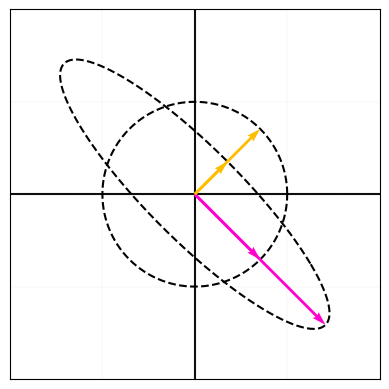

In [75]:
fig, ax = plt.subplots()  

theta_array = np.linspace(0,2*np.pi,721)
# 极坐标到直角坐标
x1_array = np.cos(theta_array)
x2_array = np.sin(theta_array)
unit_circle = np.column_stack([x1_array,x2_array])

A_unit_circle = unit_circle @ A.T # A线性变换
A_v1 = A@v_1
A_v2 = A@v_2

# 第一特征向量
plt.quiver(0, 0, A_v1[0], A_v1[1], 
           angles='xy', scale_units='xy', 
           scale=1, color='#FF00CF', zorder = 1e5)
plt.quiver(0, 0, v_1[0], v_1[1], 
           angles='xy', scale_units='xy', 
           scale=1, color='#FF00CF', zorder = 1e5)

# 第二特征向量
plt.quiver(0, 0, A_v2[0], A_v2[1], 
           angles='xy', scale_units='xy', 
           scale=1, color='#FFBD00', zorder = 1e5)
plt.quiver(0, 0, v_2[0], v_2[1], 
           angles='xy', scale_units='xy', 
           scale=1, color='#FFBD00', zorder = 1e5)

# 绘制变换前后单位圆
plt.plot(A_unit_circle[:,0],A_unit_circle[:,1], c = 'k', ls = '--')
plt.plot(unit_circle[:,0],unit_circle[:,1], c = 'k', ls = '--')

# 装饰
plt.axvline(x=0, color='k', zorder=0)
plt.axhline(y=0, color='k', zorder=0)
ax.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
ax.set_aspect(1)
lim = 2; ax.set_xlim([-lim, lim]); ax.set_ylim([-lim, lim])
plt.xticks(np.arange(-lim, lim)); plt.yticks(np.arange(-lim, lim))
ax.grid(linestyle='--', linewidth=0.15, color=[0.8, 0.8, 0.8])  # 添加网格

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  